In [1]:
# Code to run the notebook in GPU
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("GPU memory growth enabled.")
    except RuntimeError as e:
        print("RuntimeError:", e)

GPU memory growth enabled.


# Problem Statement

# Ninjacart is India's largest fresh produce supply chain company. They are pioneers in solving one of the toughest supply chain problems of the world by leveraging innovative technology. They source fresh produce from farmers and deliver them to businesses within 12 hours. An integral component of their automation process is the development of robust classifiers which can distinguish between images of different types of vegetables, while also correctly labeling images that do not contain any one type of vegetable as noise.

# Importing the required Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import tensorflow as tf

In [5]:
path_train=r'C:\Users\Arun\Documents\Scaler\Computer Vision\Project 1\ninjacart_data\train'
path_test=r'C:\Users\Arun\Documents\Scaler\Computer Vision\Project 1\ninjacart_data\test'

In [58]:
batch=32
# batch=4
image_size=(224,224)

In [59]:
train_data=tf.keras.preprocessing.image_dataset_from_directory(path_train,validation_split=0.2,seed=123,\
                                                               batch_size=batch,image_size=image_size,subset='training')

Found 3135 files belonging to 4 classes.
Using 2508 files for training.


In [60]:
len(train_data)

79

In [61]:
val_data=tf.keras.preprocessing.image_dataset_from_directory(path_train,validation_split=0.2,seed=123,\
                                                               batch_size=batch,image_size=image_size,subset='validation')

Found 3135 files belonging to 4 classes.
Using 627 files for validation.


In [62]:
len(val_data)

20

# overall we have 3135 images of 4 class out which we have taken 2508 images (79 batches) for training and 627 images (20 batches) for validation

# We will import test data as well

In [63]:
test_data=tf.keras.preprocessing.image_dataset_from_directory(path_test,seed=123,\
                                                               batch_size=batch,image_size=image_size)

Found 351 files belonging to 4 classes.


# we have 351 unknow images to check our model performance

# list of class name present in the dataset

In [12]:
print("label in train dataset :",train_data.class_names)
print("label in validation dataset :",val_data.class_names)
print("label in test dataset :",test_data.class_names)

label in train dataset : ['indian market', 'onion', 'potato', 'tomato']
label in validation dataset : ['indian market', 'onion', 'potato', 'tomato']
label in test dataset : ['indian market', 'onion', 'potato', 'tomato']


# Let's we we some sample images from the train dataset

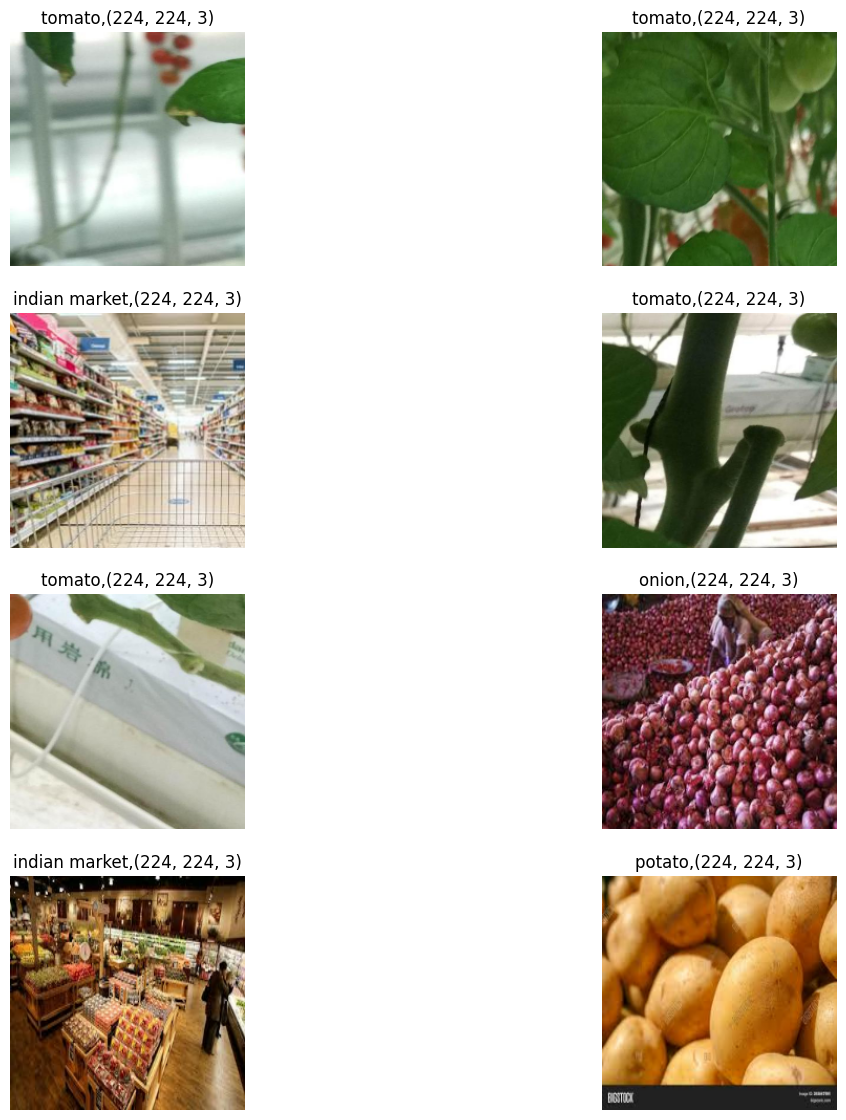

In [35]:
class_name=train_data.class_names
plt.figure(figsize=(14,14))
for image,label in train_data.take(1):
    for i in range(8):
        ax=plt.subplot(4,2,i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(f"{class_name[label[i]]},{image[i].shape}")
        plt.axis("off")

In [30]:
from collections import Counter

In [32]:
class_counts = Counter()
for images, labels in train_data:
    class_counts.update(labels.numpy())

In [33]:
class_counts

Counter({2: 731, 1: 682, 3: 619, 0: 476})

In [46]:
df=pd.DataFrame.from_dict({class_name[id]:count for id,count in class_counts.items()},orient='index').rename(columns={0:'Values'})

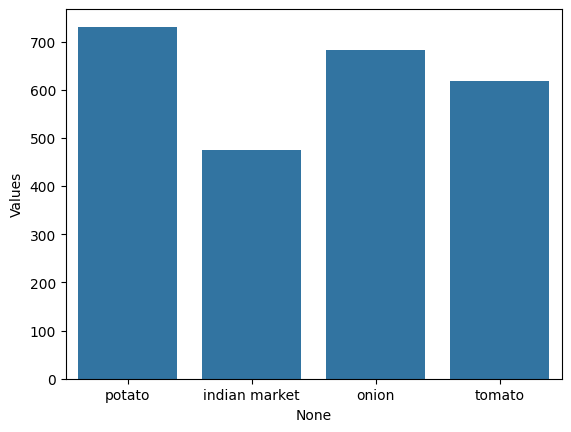

In [48]:
sns.barplot(data=df,x=df.index,y=df.Values)
plt.show()

In [52]:
class_count_val=Counter()
class_count_test=Counter()
for images, labels in val_data:
    class_count_val.update(labels.numpy())
for images, labels in test_data:
    class_count_test.update(labels.numpy())
df1=pd.DataFrame.from_dict({class_name[id]:count for id,count in class_count_val.items()},orient='index').rename(columns={0:'Values'})
df2=pd.DataFrame.from_dict({class_name[id]:count for id,count in class_count_test.items()},orient='index').rename(columns={0:'Values'})


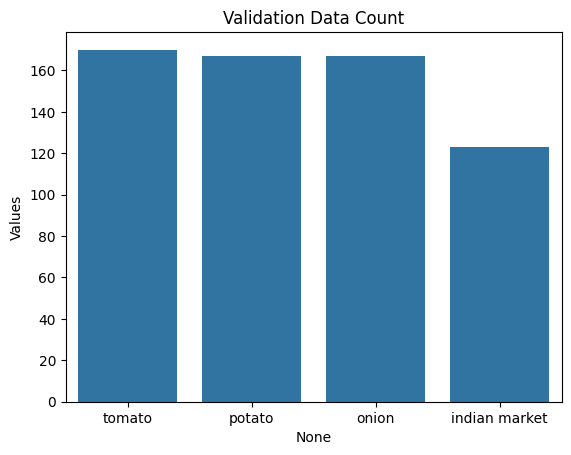

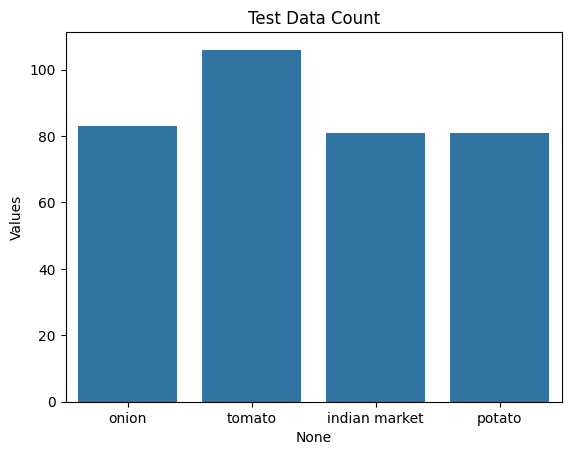

In [56]:
sns.barplot(data=df1,x=df1.index,y=df1.Values)
plt.title("Validation Data Count")
plt.show()
sns.barplot(data=df2,x=df2.index,y=df2.Values)
plt.title("Test Data Count")
plt.show()

In [12]:
from tensorflow.keras import Model

In [13]:
from tensorflow.keras import layers

In [14]:
from tensorflow.keras.layers import Dense,MaxPool2D,Flatten,Conv2D

In [16]:
def model1():
    model=tf.keras.Sequential([
        tf.keras.layers.Input(shape=(224,224,3)),
        Conv2D(filters=64,kernel_size=(3,3),padding="same",activation="relu"),
        Conv2D(filters=64,kernel_size=(3,3),padding="same",activation="relu"),
        MaxPool2D(pool_size=(2, 2),strides=(2,2)),

        Conv2D(filters=128,kernel_size=(3,3),padding="same",activation="relu"),
        Conv2D(filters=128,kernel_size=(3,3),padding="same",activation="relu"),
        MaxPool2D(pool_size=(2, 2),strides=(2,2)),

        Conv2D(filters=256,kernel_size=(3,3),padding="same",activation="relu"),
        Conv2D(filters=256,kernel_size=(3,3),padding="same",activation="relu"),
        MaxPool2D(pool_size=(2, 2),strides=(2,2)),

        Conv2D(filters=512,kernel_size=(3,3),padding="same",activation="relu"),
        Conv2D(filters=512,kernel_size=(1,1),activation="relu"),

        tf.keras.layers.GlobalAveragePooling2D(),

        Dense(64,activation='relu'),

        Dense(4,activation='softmax')])

    return model

In [17]:
base_model=model1()

In [18]:
base_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [19]:
base_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# Preprocessing Layer

In [64]:
data_processing=tf.keras.Sequential([layers.Rescaling(1.0/255),\
                                     layers.RandomFlip("horizontal_and_vertical"),\
                                     layers.RandomRotation(0.2),\
                                     layers.RandomZoom(0.2),\
                                     layers.RandomContrast(0.2)])

In [65]:
data_processing_val=tf.keras.Sequential([layers.Rescaling(1.0/255)])

In [66]:
train=train_data.map(lambda x, y: (data_processing(x), y))

In [67]:
val=val_data.map(lambda x, y: (data_processing_val(x), y))

In [61]:
base_model_history=base_model.fit(train,epochs=5,validation_data=val,verbose=1)

Epoch 1/5
79/79 [==============================] - 55s 683ms/step - loss: 0.4462 - accuracy: 0.8230 - val_loss: 0.3976 - val_accuracy: 0.8357
Epoch 2/5
79/79 [==============================] - 54s 683ms/step - loss: 0.4454 - accuracy: 0.8321 - val_loss: 0.4026 - val_accuracy: 0.8325
Epoch 3/5
79/79 [==============================] - 53s 665ms/step - loss: 0.4290 - accuracy: 0.8373 - val_loss: 0.3923 - val_accuracy: 0.8341
Epoch 4/5
79/79 [==============================] - 35s 435ms/step - loss: 0.3948 - accuracy: 0.8453 - val_loss: 0.3785 - val_accuracy: 0.8453
Epoch 5/5
79/79 [==============================] - 34s 425ms/step - loss: 0.4026 - accuracy: 0.8381 - val_loss: 0.3491 - val_accuracy: 0.8644


In [62]:
def train_plot(metrics,model_trained):
    
    f,ax=plt.subplots(1,len(metrics),figsize=(10,6))
    for idx,metric in enumerate(metrics):
        ax[idx].plot(model_trained.history[metric],ls='dashed')
        ax[idx].set_xlabel("Epochs")
        ax[idx].set_ylabel(metric)
        ax[idx].plot(model_trained.history['val_' + metric]);
        ax[idx].legend([metric, 'val_' + metric])

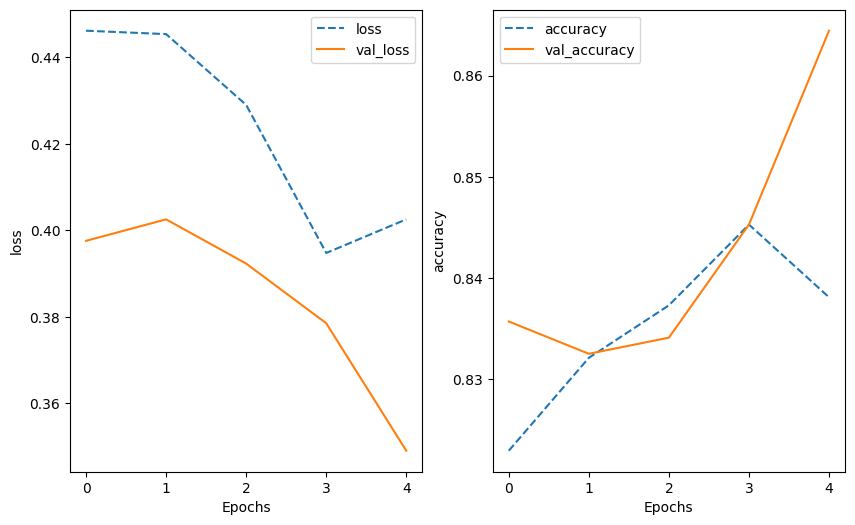

In [63]:
train_plot(['loss','accuracy'],base_model_history)

# We were able to get 83% accuracy using the base model

In [64]:
base_model.save(r'C:\Users\Arun\Documents\Scaler\Computer Vision\Project 1\base_model')

INFO:tensorflow:Assets written to: C:\Users\Arun\Documents\Scaler\Computer Vision\Project 1\base_model\assets


INFO:tensorflow:Assets written to: C:\Users\Arun\Documents\Scaler\Computer Vision\Project 1\base_model\assets


# Let's evaluate the validation data

In [92]:
base_model.evaluate(val)

20/20 [==============================] - 2s 88ms/step - loss: 0.3491 - accuracy: 0.8644


[0.349063515663147, 0.8644338250160217]

1/1 [==============================] - 0s 19ms/step


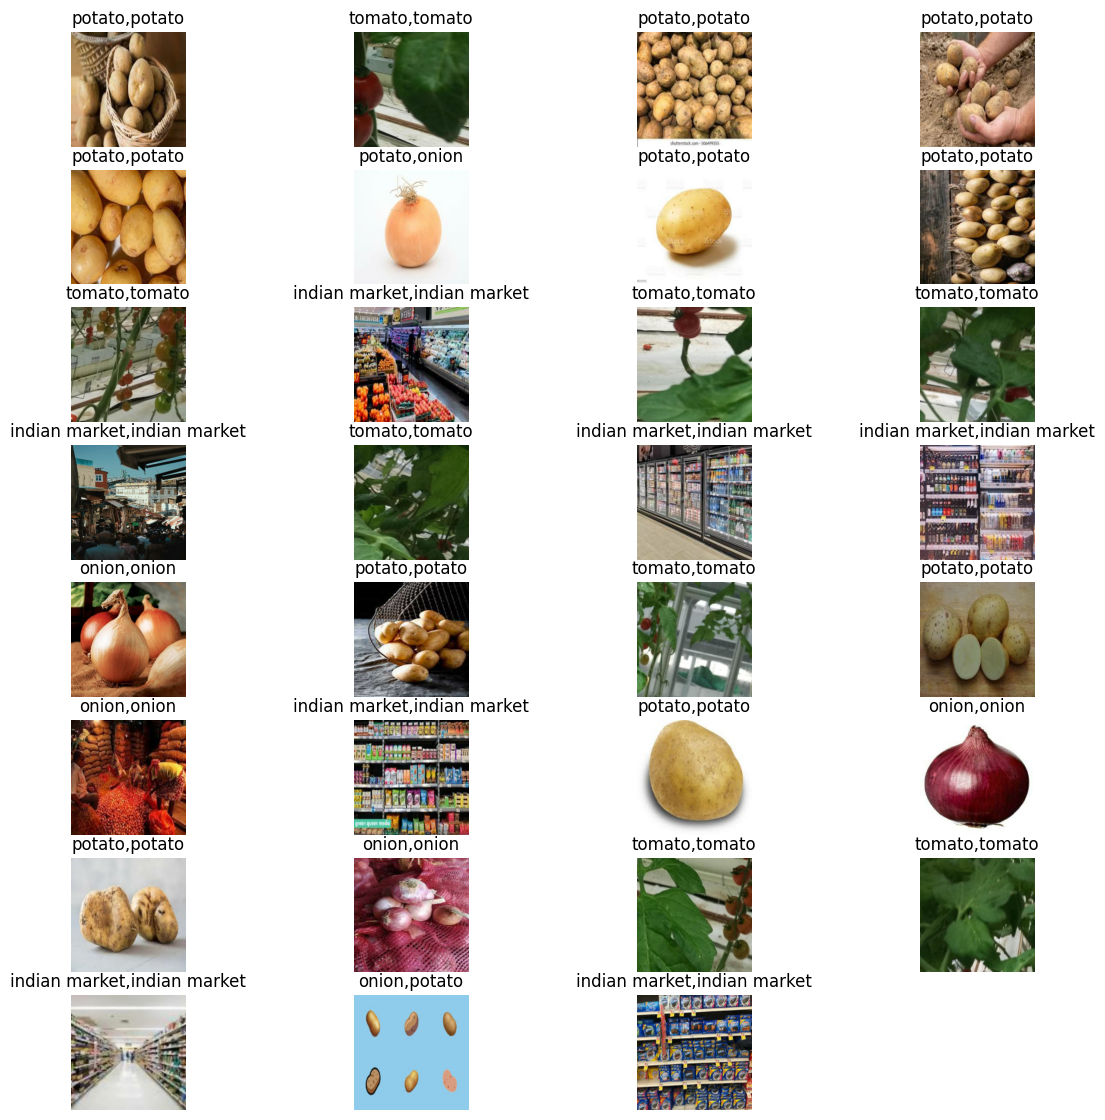

In [84]:
class_name=train_data.class_names
plt.figure(figsize=(14,14))
for image,label in val_data.take(1):
    for i in range(31):
        ax=plt.subplot(8,4,i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        temp=data_processing_val(image[i])
        y_probs=base_model.predict(tf.expand_dims(temp, axis=0))
        lab=np.argmax(y_probs,axis=1)
        plt.title(f"{class_name[lab[0]]},{class_name[label[i]]}")
        plt.axis("off")


In [68]:
test=test_data.map(lambda x, y: (data_processing_val(x), y))

In [90]:
base_model.evaluate(test)

11/11 [==============================] - 4s 382ms/step - loss: 0.4609 - accuracy: 0.8348


[0.4609208106994629, 0.8347578644752502]

1/1 [==============================] - 0s 16ms/step


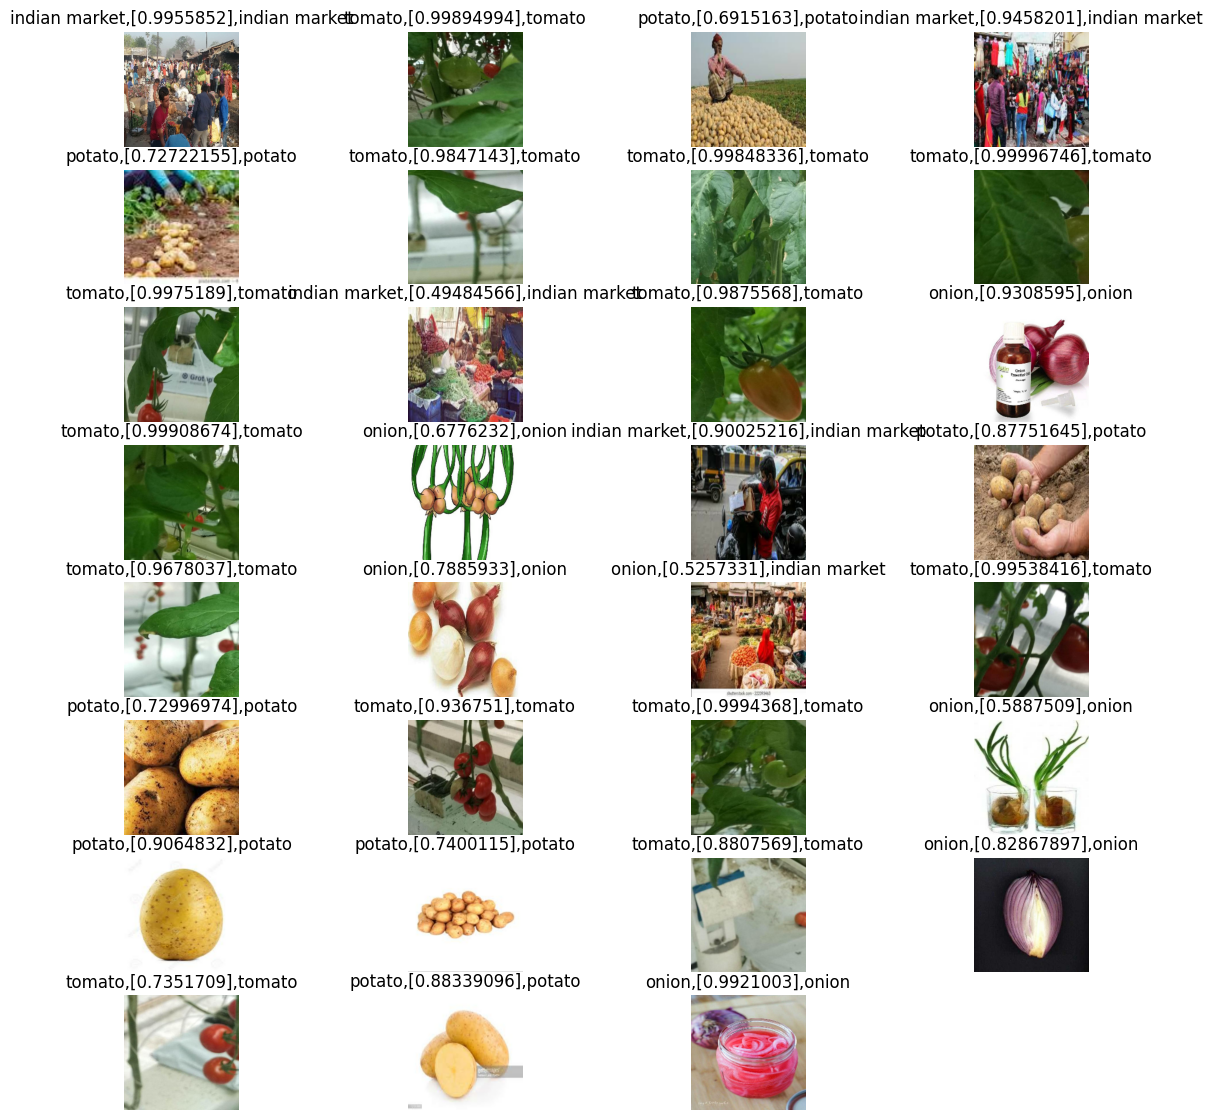

In [97]:
class_name=train_data.class_names
plt.figure(figsize=(14,14))
for image,label in test_data.take(1):
    for i in range(31):
        ax=plt.subplot(8,4,i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        temp=data_processing_val(image[i])
        y_probs=base_model.predict(tf.expand_dims(temp, axis=0))
        lab=np.argmax(y_probs,axis=1)
        plt.title(f"{class_name[lab[0]]},{np.max(y_probs,axis=1)},{class_name[label[i]]}")
        plt.axis("off")

# We got test accuracy as 83%

# Model with skip learning

In [19]:
def model2():

    #Inception block

    x=layers.Input(shape=(224,224,3))
    inc_con1=Conv2D(filters=128,kernel_size=(1,1),padding='same',activation='relu')(x)
    
    inc_con3=Conv2D(filters=96,kernel_size=(1,1),padding='same',activation='relu')(x)
    inc_con3=Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu')(inc_con3)

    inc_con5=Conv2D(filters=96,kernel_size=(1,1),padding='same',activation='relu')(x)
    inc_con5=Conv2D(filters=128,kernel_size=(5,5),padding='same',activation='relu')(inc_con5)

    pool=MaxPool2D((3,3),strides=(1,1),padding='same')(x)
    pool=Conv2D(filters=128,kernel_size=(1,1),padding='same',activation='relu')(pool)

    out_inc=layers.concatenate([inc_con1,inc_con3,inc_con5,pool],axis=-1)


    #Resent Identity Block

    skip1=out_inc

    iden_conv=Conv2D(filters=128,kernel_size=(1,1),padding='valid')(out_inc)
    iden_conv=layers.BatchNormalization(axis=3)(iden_conv)
    iden_conv=layers.Activation('relu')(iden_conv)

    iden_conv=Conv2D(filters=128,kernel_size=(3,3),padding='same')(iden_conv)
    iden_conv=layers.BatchNormalization(axis=3)(iden_conv)

    iden_conv=Conv2D(filters=512,kernel_size=(1,1),padding='valid')(iden_conv)
    iden_conv=layers.BatchNormalization(axis=3)(iden_conv)

    iden_conv=layers.Add()([iden_conv,skip1])
    iden_conv=layers.Activation('relu')(iden_conv)

    conv1=Conv2D(filters=512,kernel_size=(3,3),padding='valid',activation='relu',strides=(2,2))(iden_conv)

    conv2=Conv2D(filters=512,kernel_size=(5,5),padding='valid',activation='relu',strides=(2,2))(conv1) 

    conv3=Conv2D(filters=512,kernel_size=(3,3),padding='valid',activation='relu',strides=(2,2))(conv2) 

    conv4=Conv2D(filters=512,kernel_size=(1,1),padding='valid',activation='relu')(conv3)

    flat=tf.keras.layers.GlobalAveragePooling2D()(conv4)

    dense_layer1=Dense(64,activation='relu')(flat)

    output=Dense(4,activation='softmax')(dense_layer1)

    model=Model(inputs=x, outputs=output, name='inception_resnet_combo')

    return model

In [20]:
model1=model2()

In [21]:
model1.summary()

Model: "inception_resnet_combo"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 224, 224, 96  384         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_3 (Conv2D)              (None, 224, 224, 96  384         ['input_1[0][0]']                
                                )                                            

In [22]:
model1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [25]:
LR_decay=tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.3, patience=3, min_lr=0.00001)

In [26]:
EarlyStoppingCallback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [49]:
model1_history=model1.fit(train,epochs=15,validation_data=val,verbose=1,callbacks=[LR_decay,EarlyStoppingCallback])

Epoch 1/15
627/627 [==============================] - 432s 657ms/step - loss: 1.1399 - accuracy: 0.5016 - val_loss: 1.1910 - val_accuracy: 0.4737 - lr: 0.0010
Epoch 2/15
 54/627 [=>............................] - ETA: 5:57 - loss: 0.9600 - accuracy: 0.5741

KeyboardInterrupt: 

# It takes long time

# Since the model takes long time, we will perform transfer learning using efficientnet

In [51]:
pretrained=tf.keras.applications.EfficientNetB7(weights='imagenet',include_top=False)

258076736/258076736 [==============================] - 16s 0us/step


In [52]:
pretrained.trainable=False

In [56]:
model3=tf.keras.Sequential([pretrained,\
                           tf.keras.layers.GlobalAveragePooling2D(),\
                           Dense(64,activation='relu'),
                           Dense(4,activation='softmax')])

In [57]:
model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb7 (Functional)  (None, None, None, 2560)  64097687 
                                                                 
 global_average_pooling2d_2   (None, 2560)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_3 (Dense)             (None, 64)                163904    
                                                                 
 dense_4 (Dense)             (None, 4)                 260       
                                                                 
Total params: 64,261,851
Trainable params: 164,164
Non-trainable params: 64,097,687
_________________________________________________________________


In [69]:
model3.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [70]:
model3_history=model3.fit(train,epochs=15,validation_data=val,verbose=1,callbacks=[LR_decay,EarlyStoppingCallback])

Epoch 1/15
79/79 [==============================] - 76s 753ms/step - loss: 1.3907 - accuracy: 0.2727 - val_loss: 1.3673 - val_accuracy: 0.2663 - lr: 0.0010
Epoch 2/15
79/79 [==============================] - 48s 611ms/step - loss: 1.3704 - accuracy: 0.2887 - val_loss: 1.3618 - val_accuracy: 0.2743 - lr: 0.0010
Epoch 3/15
79/79 [==============================] - 49s 620ms/step - loss: 1.3607 - accuracy: 0.2970 - val_loss: 1.3685 - val_accuracy: 0.2663 - lr: 0.0010
Epoch 4/15
79/79 [==============================] - 52s 653ms/step - loss: 1.3531 - accuracy: 0.3078 - val_loss: 1.3393 - val_accuracy: 0.2871 - lr: 0.0010
Epoch 5/15
79/79 [==============================] - 53s 666ms/step - loss: 1.3511 - accuracy: 0.3022 - val_loss: 1.3340 - val_accuracy: 0.2887 - lr: 0.0010
Epoch 6/15
79/79 [==============================] - 52s 662ms/step - loss: 1.3312 - accuracy: 0.3158 - val_loss: 1.3186 - val_accuracy: 0.3174 - lr: 0.0010
Epoch 7/15
79/79 [==============================] - 52s 663ms/st

In [71]:
pretrained1=tf.keras.applications.EfficientNetB4(weights='imagenet',include_top=False)

71686520/71686520 [==============================] - 5s 0us/step


In [72]:
pretrained1.trainable=False

In [73]:
model4=tf.keras.Sequential([pretrained1,\
                           tf.keras.layers.GlobalAveragePooling2D(),\
                           Dense(4,activation='softmax')])

In [74]:
model4.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb4 (Functional)  (None, None, None, 1792)  17673823 
                                                                 
 global_average_pooling2d_3   (None, 1792)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_5 (Dense)             (None, 4)                 7172      
                                                                 
Total params: 17,680,995
Trainable params: 7,172
Non-trainable params: 17,673,823
_________________________________________________________________


In [76]:
model4.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [77]:
model4_history=model4.fit(train,epochs=15,validation_data=val,verbose=1,callbacks=[LR_decay,EarlyStoppingCallback])

Epoch 1/15
79/79 [==============================] - 38s 371ms/step - loss: 1.3646 - accuracy: 0.3214 - val_loss: 1.3323 - val_accuracy: 0.2711 - lr: 0.0010
Epoch 2/15
79/79 [==============================] - 24s 308ms/step - loss: 1.3408 - accuracy: 0.3301 - val_loss: 1.2842 - val_accuracy: 0.4067 - lr: 0.0010
Epoch 3/15
79/79 [==============================] - 25s 318ms/step - loss: 1.3179 - accuracy: 0.3425 - val_loss: 1.3051 - val_accuracy: 0.3397 - lr: 0.0010
Epoch 4/15
79/79 [==============================] - 26s 332ms/step - loss: 1.3013 - accuracy: 0.3664 - val_loss: 1.2520 - val_accuracy: 0.3844 - lr: 0.0010
Epoch 5/15
79/79 [==============================] - 27s 342ms/step - loss: 1.3018 - accuracy: 0.3708 - val_loss: 1.2380 - val_accuracy: 0.4657 - lr: 0.0010
Epoch 6/15
79/79 [==============================] - 26s 330ms/step - loss: 1.2730 - accuracy: 0.4019 - val_loss: 1.2257 - val_accuracy: 0.4801 - lr: 0.0010
Epoch 7/15
79/79 [==============================] - 26s 328ms/st

# Val accuracy is around 45%

In [83]:
pretrained2=tf.keras.applications.EfficientNetB4(weights='imagenet',include_top=False)

In [84]:
for layer in pretrained2.layers[:-3]:
    layer.trainable = False

In [85]:
model5=tf.keras.Sequential([pretrained2,\
                           tf.keras.layers.GlobalAveragePooling2D(),\
                           Dense(4,activation='softmax')])

In [86]:
model5.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb4 (Functional)  (None, None, None, 1792)  17673823 
                                                                 
 global_average_pooling2d_5   (None, 1792)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_7 (Dense)             (None, 4)                 7172      
                                                                 
Total params: 17,680,995
Trainable params: 813,572
Non-trainable params: 16,867,423
_________________________________________________________________


In [87]:
model5.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [88]:
model5_history=model5.fit(train,epochs=15,validation_data=val,verbose=1,callbacks=[LR_decay,EarlyStoppingCallback])

Epoch 1/15
79/79 [==============================] - 41s 400ms/step - loss: 1.2662 - accuracy: 0.4023 - val_loss: 1.3232 - val_accuracy: 0.3190 - lr: 0.0010
Epoch 2/15
79/79 [==============================] - 28s 355ms/step - loss: 1.2142 - accuracy: 0.4322 - val_loss: 1.1751 - val_accuracy: 0.4530 - lr: 0.0010
Epoch 3/15
79/79 [==============================] - 28s 350ms/step - loss: 1.1960 - accuracy: 0.4270 - val_loss: 1.1944 - val_accuracy: 0.4561 - lr: 0.0010
Epoch 4/15
79/79 [==============================] - 29s 371ms/step - loss: 1.1705 - accuracy: 0.4462 - val_loss: 1.1172 - val_accuracy: 0.4801 - lr: 0.0010
Epoch 5/15
79/79 [==============================] - 29s 365ms/step - loss: 1.1932 - accuracy: 0.4438 - val_loss: 1.1621 - val_accuracy: 0.3907 - lr: 0.0010
Epoch 6/15
79/79 [==============================] - 31s 388ms/step - loss: 1.1642 - accuracy: 0.4581 - val_loss: 1.2508 - val_accuracy: 0.4354 - lr: 0.0010
Epoch 7/15
79/79 [==============================] - 29s 369ms/st

# Transfer learning is fast, but accuracy is less than the base model. we may require to release more layers as trainable

In [89]:
final_model = tf.keras.models.load_model('base_model')

In [90]:
final_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [91]:
final_model.evaluate(val)

20/20 [==============================] - 8s 216ms/step - loss: 0.3491 - accuracy: 0.8644


[0.34906309843063354, 0.8644338250160217]

In [92]:
final_model.evaluate(test)

11/11 [==============================] - 5s 396ms/step - loss: 0.4609 - accuracy: 0.8348


[0.4609205424785614, 0.8347578644752502]